In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\nisar\\one drive\\Desktop\\IEEE\\combined_eeg_data.csv")
df.head()

,channel0,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,channel9,channel10,channel11,channel12,channel13,channel14,channel15,label,file_name
0,347.78,198.73,637.59,298.09,278.77,77.28,259.45,408.50,118.69,-110.41,-460.94,-391.94,-11.04,278.77,-792.16,-281.53,0,S10W1.eea.csv
1,507.87,358.82,659.67,317.42,378.14,198.73,378.14,449.90,179.41,-121.45,-422.30,-300.85,-22.08,309.14,-800.44,-240.13,0,S10W1.eea.csv
2,488.54,449.90,488.54,317.42,378.14,419.54,529.95,499.58,149.05,-80.04,-41.40,129.73,138.01,309.14,-342.26,-11.04,0,S10W1.eea.csv
3,369.86,309.14,328.46,289.81,317.42,397.46,507.87,458.18,88.32,27.60,259.45,427.82,309.14,289.81,69.00,259.45,0,S10W1.eea.csv
4,347.78,149.05,248.41,289.81,328.46,408.50,529.95,477.50,187.69,458.18,797.68,858.40,687.27,378.14,877.72,709.36,0,S10W1.eea.csv


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop(['label', 'file_name'], axis=1)  # EEG channels --- features
y = df['label']  # labels --- target (0 for healthy, 1 for schizophrenic)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred_rf = rf_model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

In [11]:
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(class_report_rf)

Random Forest Accuracy: 0.7540
Random Forest Confusion Matrix:
[[40623 19178]
 [12556 56667]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72     59801
           1       0.75      0.82      0.78     69223

    accuracy                           0.75    129024
   macro avg       0.76      0.75      0.75    129024
weighted avg       0.75      0.75      0.75    129024



In [12]:
import seaborn as sns

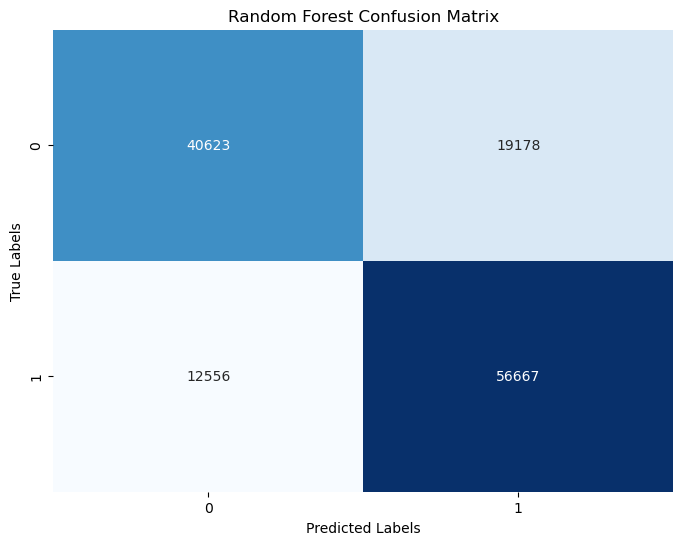

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [14]:
import pickle

In [15]:
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)